In [7]:
# Vizualization of my personal Snapchat Chat data.

In [8]:
import json
import matplotlib.pyplot as plt

In [9]:
with open('/content/chat_history.json') as json_file:
  data = json.load(json_file)

In [10]:
# Get all users from 'Received Saved Chat History'

# Create dict for easier processing later on
receivedFromUsers = {}
for message in data['Received Saved Chat History']:
	if message["From"] in receivedFromUsers:
		pass
	else:
		receivedFromUsers[message["From"]] = 0

# Not printed for user privace upon display
#print(receivedFromUsers)

In [11]:
# Get num of received message from each user
x = 0
for user in receivedFromUsers:
	for message in data['Received Saved Chat History']:
		if message["From"] == user:
			receivedFromUsers[user] += 1
	x = 0

# Not printed for user privace upon display
#print(receivedFromUsers)

In [12]:
# Change usernames for privacy

x = 0
receivedFromUsersCleaned = {}
for user in receivedFromUsers:
  receivedFromUsersCleaned[f'user{x}'] = receivedFromUsers[user]
  x+=1

# Compare to make sure values from each list are equal
prePrivacy = sorted(receivedFromUsers.values())
postPrivacy = sorted(receivedFromUsersCleaned.values())
print(prePrivacy)
print(postPrivacy)

[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 9, 10, 10, 11, 11, 12, 15, 21, 21, 21, 23, 27, 30, 31, 34, 34, 41, 52, 56, 65, 83, 84, 94, 101, 118, 132, 193, 406, 474, 1201, 1417, 1558, 182511]
[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 9, 10, 10, 11, 11, 12, 15, 21, 21, 21, 23, 27, 30, 31, 34, 34, 41, 52, 56, 65, 83, 84, 94, 101, 118, 132, 193, 406, 474, 1201, 1417, 1558, 182511]


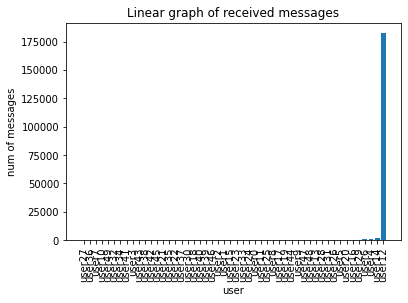

{'user27': 1, 'user36': 1, 'user7': 2, 'user10': 2, 'user49': 2, 'user32': 3, 'user34': 3, 'user41': 3, 'user3': 4, 'user43': 4, 'user38': 5, 'user42': 5, 'user45': 5, 'user21': 6, 'user35': 6, 'user22': 7, 'user37': 7, 'user30': 9, 'user18': 10, 'user40': 10, 'user39': 11, 'user46': 11, 'user2': 12, 'user1': 15, 'user15': 21, 'user23': 21, 'user33': 21, 'user24': 23, 'user0': 27, 'user11': 30, 'user25': 31, 'user8': 34, 'user17': 34, 'user19': 41, 'user44': 52, 'user9': 56, 'user47': 65, 'user48': 83, 'user13': 84, 'user28': 94, 'user31': 101, 'user26': 118, 'user5': 132, 'user20': 193, 'user16': 406, 'user29': 474, 'user6': 1201, 'user4': 1417, 'user14': 1558, 'user12': 182511}


In [13]:
# Vizualize all chats received

data = dict(sorted(receivedFromUsersCleaned.items(), key=lambda item: item[1]))
plt.bar(range(len(data)), list(sorted(data.values())), align='center')
plt.xlabel('user') 
plt.ylabel('num of messages')
plt.title("Linear graph of received messages")

plt.xticks(range(len(data)), list(data.keys()), rotation = 90)

plt.show()
print(data)

In [14]:
# As you can see user 12 is greatly distorting our graph
# To fix this we will remove user 12
receivedFromUsersCleaned.pop('user12')

182511

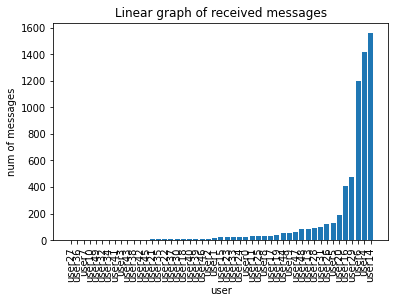

{'user27': 1, 'user36': 1, 'user7': 2, 'user10': 2, 'user49': 2, 'user32': 3, 'user34': 3, 'user41': 3, 'user3': 4, 'user43': 4, 'user38': 5, 'user42': 5, 'user45': 5, 'user21': 6, 'user35': 6, 'user22': 7, 'user37': 7, 'user30': 9, 'user18': 10, 'user40': 10, 'user39': 11, 'user46': 11, 'user2': 12, 'user1': 15, 'user15': 21, 'user23': 21, 'user33': 21, 'user24': 23, 'user0': 27, 'user11': 30, 'user25': 31, 'user8': 34, 'user17': 34, 'user19': 41, 'user44': 52, 'user9': 56, 'user47': 65, 'user48': 83, 'user13': 84, 'user28': 94, 'user31': 101, 'user26': 118, 'user5': 132, 'user20': 193, 'user16': 406, 'user29': 474, 'user6': 1201, 'user4': 1417, 'user14': 1558}


In [15]:
# Vizualize all chats received without user 10
data = dict(sorted(receivedFromUsersCleaned.items(), key=lambda item: item[1]))
plt.bar(range(len(data)), list(sorted(data.values())), align='center')
plt.xlabel('user') 
plt.ylabel('num of messages')
plt.title("Linear graph of received messages")

plt.xticks(range(len(data)), list(data.keys()), rotation = 90)

plt.show()
print(data)

In [16]:
# As you can see this is way easier to look at.
## At user21 we are able to see bars appear on out graph.
## user21 has a value of 6. I want to remove an user with 5 messages and below 

receivedFromUsersCleaned = {key:val for key, val in receivedFromUsersCleaned.items() if val > 5}
data = dict(sorted(receivedFromUsersCleaned.items(), key=lambda item: item[1]))
print(data)

{'user21': 6, 'user35': 6, 'user22': 7, 'user37': 7, 'user30': 9, 'user18': 10, 'user40': 10, 'user39': 11, 'user46': 11, 'user2': 12, 'user1': 15, 'user15': 21, 'user23': 21, 'user33': 21, 'user24': 23, 'user0': 27, 'user11': 30, 'user25': 31, 'user8': 34, 'user17': 34, 'user19': 41, 'user44': 52, 'user9': 56, 'user47': 65, 'user48': 83, 'user13': 84, 'user28': 94, 'user31': 101, 'user26': 118, 'user5': 132, 'user20': 193, 'user16': 406, 'user29': 474, 'user6': 1201, 'user4': 1417, 'user14': 1558}


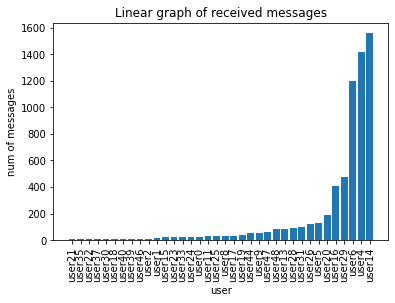

{'user21': 6, 'user35': 6, 'user22': 7, 'user37': 7, 'user30': 9, 'user18': 10, 'user40': 10, 'user39': 11, 'user46': 11, 'user2': 12, 'user1': 15, 'user15': 21, 'user23': 21, 'user33': 21, 'user24': 23, 'user0': 27, 'user11': 30, 'user25': 31, 'user8': 34, 'user17': 34, 'user19': 41, 'user44': 52, 'user9': 56, 'user47': 65, 'user48': 83, 'user13': 84, 'user28': 94, 'user31': 101, 'user26': 118, 'user5': 132, 'user20': 193, 'user16': 406, 'user29': 474, 'user6': 1201, 'user4': 1417, 'user14': 1558}


In [17]:
# Vizualize all chats received without user 10 and values greater than 5
plt.bar(range(len(data)), list(sorted(data.values())), align='center')
plt.xlabel('user') 
plt.ylabel('num of messages')
plt.title("Linear graph of received messages")

plt.xticks(range(len(data)), list(data.keys()), rotation = 90)

plt.show()
print(data)